In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [2]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [3]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 開始分析

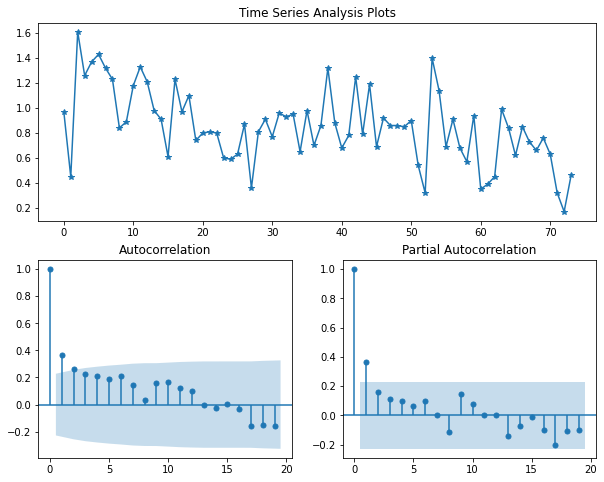

----time series: LB pure randomness test----
           LB    Pvalue  lags
0   10.175228  0.001423     1
1   15.710011  0.000388     2
2   19.779302  0.000189     3
3   23.398279  0.000105     4
4   26.314867  0.000078     5
5   29.872481  0.000042     6
6   31.642297  0.000047     7
7   31.755547  0.000103     8
8   33.953198  0.000091     9
9   36.293542  0.000075    10
10  37.641033  0.000090    11
11  38.579968  0.000123    12
12  38.580372  0.000233    13
13  38.642928  0.000414    14
14  38.644923  0.000724    15
15  38.750764  0.001181    16
16  41.121919  0.000897    17
17  43.369263  0.000709    18
18  45.852373  0.000520    19
19  46.488299  0.000690    20
20  46.517763  0.001090    21
21  46.772098  0.001571    22
22  49.901492  0.000949    23
23  49.916026  0.001451    24
24  49.940678  0.002167    25
25  50.351186  0.002854    26
26  50.358449  0.004136    27
27  50.613550  0.005520    28
28  51.867789  0.005639    29
29  52.112644  0.007406    30
30  52.524849  0.009227  

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [4]:
dfname='table3.21'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)
purerandtest(y)

## 參數估計

In [5]:
arma11=smt.ARMA(y,(1,1)).fit()
print('\n----fitting summary----')
print(arma11.summary())
print('sigma 2 of residual: %f'%arma11.sigma2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02117D-01    |proj g|=  1.33387D-01

At iterate    5    f=  8.73483D-02    |proj g|=  3.87050D-03

At iterate   10    f=  8.60641D-02    |proj g|=  5.74714D-04

At iterate   15    f=  8.60627D-02    |proj g|=  1.94289D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   1.943D-08   8.606D-02
  F =   8.6062671580653366E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

----fit

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:1472: RuntimeWarning: divi

## 模型顯著性檢驗

In [6]:
resid=arma11.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.089860  0.764355     1
1    0.119337  0.942077     2
2    0.138486  0.986849     3
3    0.139125  0.997690     4
4    0.140662  0.999625     5
5    0.403946  0.998819     6
6    0.407889  0.999719     7
7    2.445921  0.964205     8
8    2.854281  0.969793     9
9    3.562071  0.964949    10
10   3.673726  0.978509    11
11   3.955755  0.984222    12
12   4.178395  0.989141    13
13   4.218058  0.994005    14
14   4.339386  0.996396    15
15   4.401448  0.998018    16
16   6.240603  0.991418    17
17   7.682391  0.982999    18
18   9.151449  0.970878    19
19   9.243563  0.979911    20
20   9.685326  0.982715    21
21   9.686602  0.988930    22
22  13.178515  0.948012    23
23  13.410153  0.958871    24
24  13.439881  0.970641    25
25  15.158231  0.954371    26
26  15.162165  0.967096    27
27  15.994084  0.965907    28
28  18.154074  0.941072    29
29  18.949250  0.941

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
